In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

2023-02-09 10:49:05.380152: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-09 10:49:05.520253: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-09 10:49:05.527551: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-09 10:49:05.527573: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [14]:
numbers = mnist.load_data()[0][0]

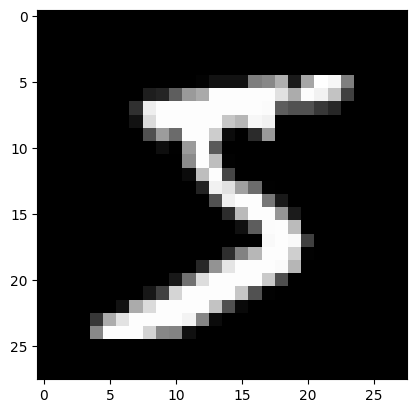

In [30]:
img = numbers[0]
plt.imshow(img, cmap="gray");

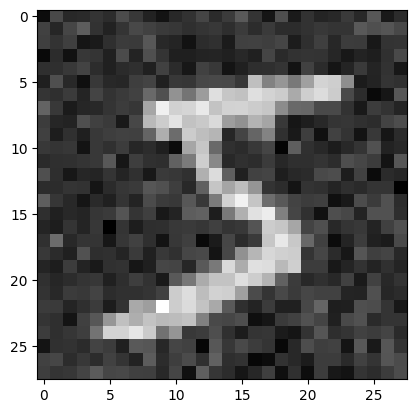

In [31]:
noisy = img + np.random.normal(scale=32, size=img.shape)
plt.imshow(noisy, cmap="gray");

# Paramètres

In [120]:
T2D = lambda x: x
T3D_ht = lambda x: x
T3D_ht_inv = lambda x: x
T3D_wie = lambda x: x
T3D_wie_inv = lambda x: x

N = 7
step = 4

threshold_dist = 10

max1 = 128

# Fonctions

In [125]:
def generate_block(img, x, N=N):

    if x[0]+N >= img.shape[0] or x[1]+N >= img.shape[1]:
        raise OverflowError(f"Hors de l'image : {x[0]}+{N} >= {img.shape[0]} or {x[1]}+{N} >= {img.shape[1]}")

    return img[x[0]:x[0]+N,x[1]:x[1]+N]

In [122]:
def dist_1(img1, img2, T2D=T2D, threshold=max1, N=N1):

    T1 = T2D(img1)
    T2 = T2D(img2)

    T1[T1 > threshold] = threshold
    T2[T2 > threshold] = threshold

    return np.linalg.norm(T1 - T2) / N**2

In [128]:
def create_set(xR, img, dist, thresh=threshold_dist, N=N):

    set_xR = []

    block_ref = generate_block(img, xR)

    for i in range(img.shape[0]-N):
        for j in range(img.shape[1]-N):
            
            x = np.array([i, j])
            block = generate_block(img, x, N)

            if dist(block_ref, block) < thresh:
                set_xR.append(x)

    return set_xR

# Tests

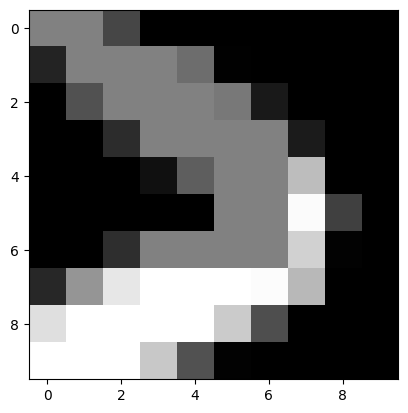

In [75]:
xR = np.array([12, 12])
block = generate_block(img, xR, 10)
plt.imshow(block, cmap="gray");

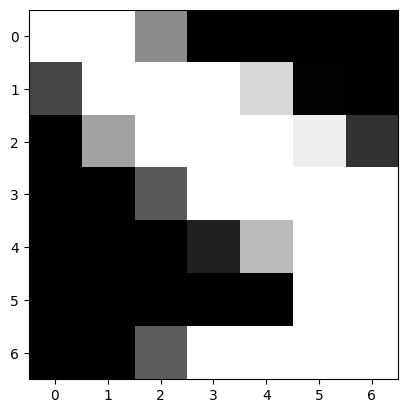

In [112]:
xR = np.array([12, 12])
block = generate_block(img, xR)
plt.imshow(block, cmap="gray");

13.889295750438489


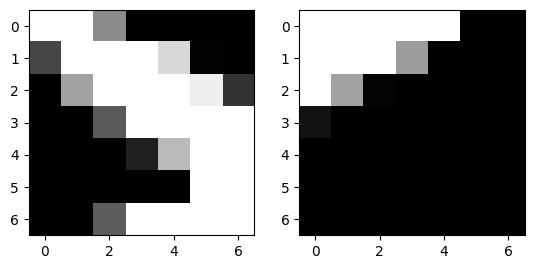

In [114]:
xR = np.array([12, 12])
x = np.array([19, 15])

block_ref = generate_block(img, xR)
block = generate_block(img, x)

print(dist_1(block_ref, block))

plt.subplot(1, 2, 1)
plt.imshow(block_ref, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(block, cmap="gray");

11.820285682835816


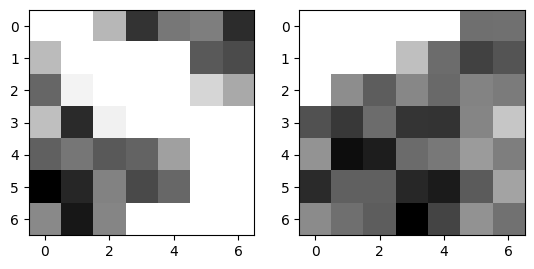

In [116]:
xR = np.array([12, 12])
x = np.array([19, 15])

block_ref = generate_block(noisy, xR)
block = generate_block(noisy, x)

print(dist_1(block_ref, block))

plt.subplot(1, 2, 1)
plt.imshow(block_ref, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(block, cmap="gray");

3


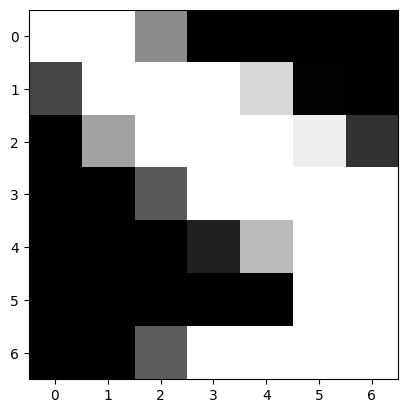

In [135]:
xR = np.array([12, 12])
S = create_set(xR, noisy, dist_1, thresh=8)

print(len(S))

block_ref = generate_block(img, xR)
plt.imshow(block_ref, cmap="gray")

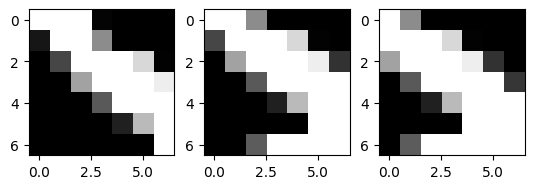

In [149]:
for i, x in enumerate(S):
    block = generate_block(img, x)
    plt.subplot(1, len(S), i+1)
    plt.imshow(block, cmap="gray")
plt.plot();

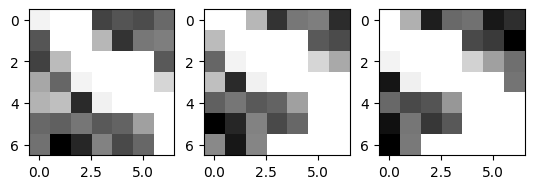

In [150]:
for i, x in enumerate(S):
    block = generate_block(noisy, x)
    plt.subplot(1, len(S), i+1)
    plt.imshow(block, cmap="gray")
plt.plot();

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe0c1041-c3d0-4be4-979f-88dc2a688327' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>